In [39]:
#required library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score

#load the dataset
data = pd.read_csv('Heart.csv')

In [58]:
# Remove the class label
X = df.drop('target', axis=1)

# Fit KMeans clustering model with k=1
kmeans = KMeans(n_clusters=1, random_state=0 , n_init=10)
kmeans.fit(X)

# Predict the clusters
y_pred = kmeans.predict(X)

# Compute accuracy, precision, and recall
accuracy = accuracy_score(df['target'], y_pred)
# the zero division 
precision_target0 = precision_score(df['target'], y_pred, pos_label=0 )
recall_target0 = recall_score(df['target'], y_pred, pos_label=0)

''' Warning: Precision score may be ill-defined for Target 1 as KMeans with only two clusters
cannot always distinguish between the two classes. To suppress the warning, set the `zero_division`
parameter to 1 in precision_score.'''
precision_target1 = precision_score(df['target'], y_pred, pos_label=1, zero_division=1)

recall_target1 = recall_score(df['target'], y_pred, pos_label=1)

# Print the results
print(f"precision\trecall")
print(f"Target 0\t{precision_target0:.2f}\t{recall_target0:.2f}")
print(f"Target 1\t{precision_target1:.2f}\t{recall_target1:.2f}")

precision	recall
Target 0	0.46	1.00
Target 1	1.00	0.00


In [41]:
# Fit KMeans clustering model with k=2
kmeans = KMeans(n_clusters=2, random_state=0 , n_init=10)
kmeans.fit(X)

# Predict the clusters
y_pred = kmeans.predict(X)

# Compute accuracy, precision, and recall
accuracy = accuracy_score(df['target'], y_pred)
# the zero division 
precision_target0 = precision_score(df['target'], y_pred, pos_label=0 )
recall_target0 = recall_score(df['target'], y_pred, pos_label=0)

# Warning: Precision score may be ill-defined for Target 1 as KMeans with only two clusters
#cannot always distinguish between the two classes. To suppress the warning, set the `zero_division`
#parameter to 1 in `precision_score`.
precision_target1 = precision_score(df['target'], y_pred, pos_label=1, zero_division=1)

recall_target1 = recall_score(df['target'], y_pred, pos_label=1)

# Print the results
print(f"precision\trecall")
print(f"Target 0\t{precision_target0:.2f}\t{recall_target0:.2f}")
print(f"Target 1\t{precision_target1:.2f}\t{recall_target1:.2f}")

precision	recall
Target 0	0.40	0.57
Target 1	0.45	0.30


In [59]:
# Fit KMeans clustering model with k=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

# Predict the clusters
y_pred = kmeans.predict(X)

# Compute accuracy, precision, and recall
accuracy = accuracy_score(df['target'], y_pred)

# Compute precision and recall for target 0

# Use zero_division=1 to avoid UndefinedMetricWarning when a class has no true samples
# Use average='macro' to compute unweighted average of precision and recall scores across classes
precision_target0 = precision_score(df['target'], y_pred, labels=[0], average='macro', zero_division=1)
recall_target0 = recall_score(df['target'], y_pred, labels=[0], average='macro', zero_division=1)

# Compute precision and recall for target 1
precision_target1 = precision_score(df['target'], y_pred, labels=[1], average='macro', zero_division=1)
recall_target1 = recall_score(df['target'], y_pred, labels=[1], average='macro', zero_division=1)

# Print the results
print(f"precision\trecall")
print(f"Target 0\t{precision_target0:.2f}\t{recall_target0:.2f}")
print(f"Target 1\t{precision_target1:.2f}\t{recall_target1:.2f}")

precision	recall
Target 0	0.49	0.19
Target 1	0.63	0.42


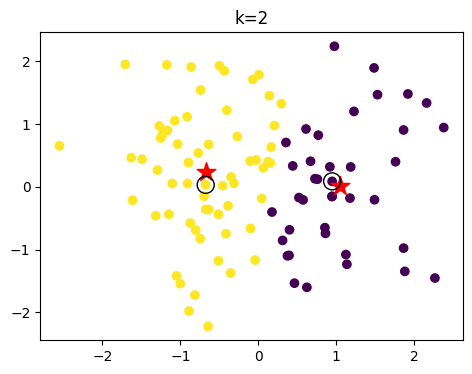

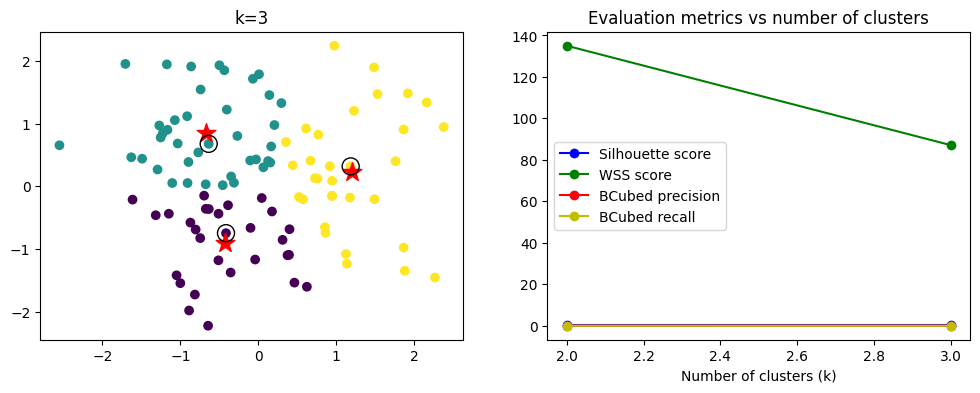

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y_true = np.array([0] * 50 + [1] * 50)  # Two distinct labels

# Define the k values to try
k_values = [ 2, 3]

# Initialize lists to store evaluation metric scores
silhouette_scores = []
wss_scores = []
precision_scores = []
recall_scores = []

# Compute evaluation metrics for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k , n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_score_k = silhouette_score(X, labels)
    wss_score_k = kmeans.inertia_
    
    # Compute precision and recall scores
    if len(np.unique(labels)) < 2:
        precision_k = 0
        recall_k = 0
    else:
        recall_k = adjusted_rand_score(labels_true=y_true, labels_pred=labels)
        precision_k = adjusted_rand_score(labels_true=labels, labels_pred=y_true)

    # Append scores to lists
    silhouette_scores.append(silhouette_score_k)
    wss_scores.append(wss_score_k)
 
    precision_scores.append(precision_k)
    recall_scores.append(recall_k)

    # Compute closest points to centroids for visualization
    closest, _= pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

    # Plot the clustering results
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='r')
    plt.scatter(X[closest, 0], X[closest, 1], s=150, marker='o', edgecolors='k', facecolors='none')
    plt.title(f"k={k}")

    # Print the evaluation metric scores
plt.subplot(122)
plt.plot(k_values, silhouette_scores, 'bo-', label='Silhouette score')
plt.plot(k_values, wss_scores, 'go-', label='WSS score')
plt.plot(k_values, precision_scores, 'ro-', label='BCubed precision')
plt.plot(k_values, recall_scores, 'yo-', label='BCubed recall')
plt.legend(loc='best')
plt.xlabel('Number of clusters (k)')
plt.title('Evaluation metrics vs number of clusters')

    # Show the plot
plt.show()

We employed an unsupervised learning technique called K-means, which performs clustering on a given dataset. This algorithm requires specifying the number of clusters, k, and produces a set of centroids and a clustered dataset as its output.

First of all we calculate calculate B-cubed precision, recall using scikit-learn as follows:
from sklearn.metrics import precision_recall_fscore_support. Also we apply k-means algorithm when the k=1, k=2, k=3.

We will compare the results of each algorithm by follows: 
-Accuracy 
-silhouette score 
-Precision and Recall


K-means when k=1

To apply the K-means algorithm to our dataset, we utilized the Python library sklearn.cluster and imported the KMeans module. Initially, we eliminated the class label from the dataset,then applied
the K-means algorithm such:

kmeans= KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans.fit(X)
The result:

-Accuracy 
The Accuracy score =0.0
Which is so bad. The accuracy 100% was inaccurate.


-silhouette score 
As there is only one cluster, the application of silhouette score is not possible in this case.

-precision and recall
                    precision         recall
Target 0           0.46               1.00
Target 1            1.00                 0.00

For target 0:
The precision is only 0.46 which is not good, and not admirable, but the recall is 1 which is good.

For target 1:
The precision is 1.00 which is good, but the recall is 0.00 which is not good.







K-means when k=2

To apply the K-means algorithm to our dataset, we utilized the Python library sklearn.cluster and imported the KMeans module. Initially, we eliminated the class label from the dataset,then applied
the K-means algorithm such:

kmeans= KMeans(n_clusters=2, random_state=0, n_init=10) 
kmeans.fit(X)
The result:

-Accuracy 
The Accuracy score =0.39
Which is not good. The accuracy was below 50%.


-silhouette score 
silhouette score =0.61, A score of 0.61 is closer to 1, which suggests that the clusters are well-separated and distinct. But the highest among the three k choices.

-precision and recall
                    precision         recall
Target 0           0.40               0.57
Target 1            0.45               0.30


For target 0:
The precision is only 0.40 which is not good, and not admirable, but the recall is 0.57 which is not good.

For target 1:
The precision is 0.45 which is not good and not admirable, but the recall is 0.30 which is not good.



K-means when k=3

To apply the K-means algorithm to our dataset, we utilized the Python library sklearn.cluster and imported the KMeans module. Initially, we eliminated the class label from the dataset,then applied
the K-means algorithm such:

kmeans= KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)
The result:

-Accuracy 
The Accuracy score =0.14
Which is not good. The accuracy was below 50%.


-silhouette score 
silhouette score =0.47, is not considered a very good result. A score of 0.47 suggests that the clusters are somewhat separated, but there is still significant overlap between them.

-precision and recall
                    precision         recall
Target 0           0.49               0.19
Target 1            0.63               0.42


For target 0:
The precision is only 0.49 which is not good, and not admirable, but the recall is 0.19 which is not good.

For target 1:
The precision is 0.63 which is not good, but the recall is 0.42 which is not good.


In conclusion, This indicates that the KMeans clustering algorithm performs better with k=2 since it has a higher silhouette score and accuracy score.